**Preparación del entorno:**

Crea un nuevo repositorio en GitHub para este challenge.
Extrae el archivo tratado del challenge anterior.

*   Elemento de la lista
*   Elemento de la lista



In [46]:
import json

with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

**Preparación y análisis de los datos:**

Realiza una preparación adicional de los datos para desarrollar modelos predictivos. Esto incluye:

* Eliminar columnas irrelevantes.
* Verificar la proporción de cancelación.
* Evaluar clases.
* Normalizar y estandarizar los modelos si es necesario.
* Realiza un análisis de correlación y selección de variables.




**1. Eliminar columnas irrelevantes**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos en un DataFrame
df = pd.json_normalize(data)

# Eliminar columnas irrelevantes (ejemplo: 'customerID')
columnas_irrelevantes = ['customerID']
df = df.drop(columns=columnas_irrelevantes, errors='ignore')  # 'errors=ignore' por si no existe la columna

# Mostrar las primeras filas para verificar
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


**2. Verificar la proporción de cancelación (Churn)**

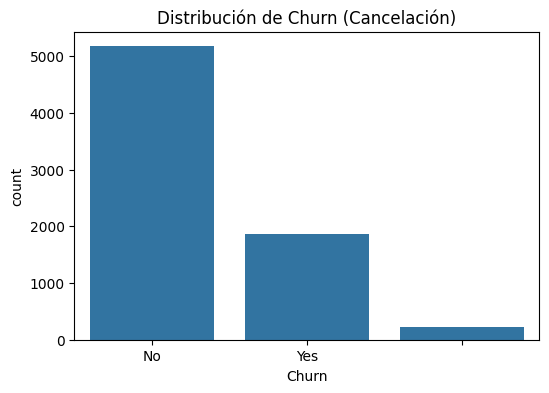

Proporción de Churn:
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


In [48]:
# Ver proporción de la variable objetivo 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Churn (Cancelación)')
plt.show()

# Proporción exacta
print("Proporción de Churn:")
print(df['Churn'].value_counts(normalize=True) * 100)

**3. Evaluar clases (análisis exploratorio - EDA)**

In [49]:
# Tipos de datos y valores únicos
print("\nTipos de datos y valores únicos:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}, Valores únicos: {df[col].nunique()}")

# Separar columnas categóricas y numéricas
categoricas = df.select_dtypes(include=['object', 'bool']).columns
numericas = df.select_dtypes(include=['int64', 'float64']).columns

print("\nVariables categóricas:", categoricas.tolist())
print("Variables numéricas:", numericas.tolist())


Tipos de datos y valores únicos:
Churn: object, Valores únicos: 3
customer.gender: object, Valores únicos: 2
customer.SeniorCitizen: int64, Valores únicos: 2
customer.Partner: object, Valores únicos: 2
customer.Dependents: object, Valores únicos: 2
customer.tenure: int64, Valores únicos: 73
phone.PhoneService: object, Valores únicos: 2
phone.MultipleLines: object, Valores únicos: 3
internet.InternetService: object, Valores únicos: 3
internet.OnlineSecurity: object, Valores únicos: 3
internet.OnlineBackup: object, Valores únicos: 3
internet.DeviceProtection: object, Valores únicos: 3
internet.TechSupport: object, Valores únicos: 3
internet.StreamingTV: object, Valores únicos: 3
internet.StreamingMovies: object, Valores únicos: 3
account.Contract: object, Valores únicos: 3
account.PaperlessBilling: object, Valores únicos: 2
account.PaymentMethod: object, Valores únicos: 4
account.Charges.Monthly: float64, Valores únicos: 1585
account.Charges.Total: object, Valores únicos: 6531

Variable

**Variables numéricas**

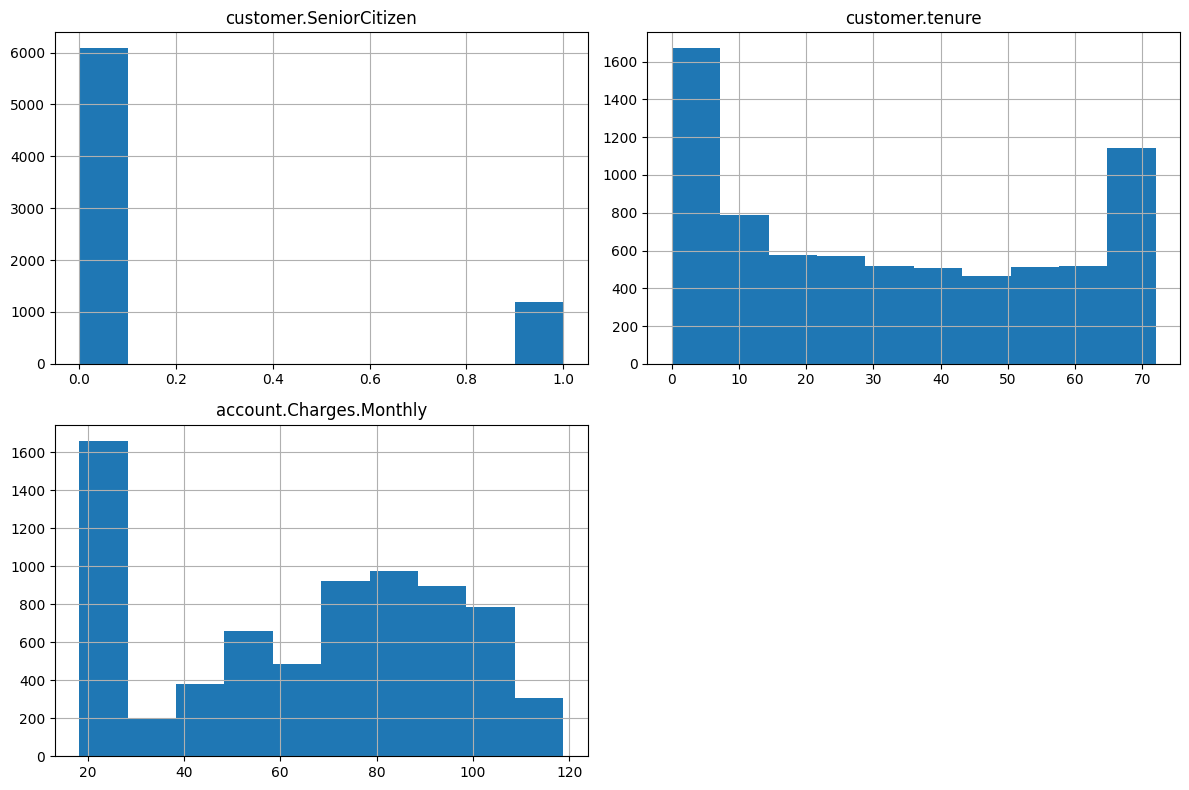

In [50]:
# Histogramas de variables numéricas
df[numericas].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

**4. Normalizar/Estandarizar (si es necesario)**

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate numerical columns before standardization
numericas_to_scale = df[numericas].columns

# Example: Estandarizar 'MonthlyCharges' and 'TotalCharges'
scaler = StandardScaler()
df[numericas_to_scale] = scaler.fit_transform(df[numericas_to_scale])

# Mostrar resultados
df[numericas_to_scale].head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
0,-0.440736,-0.950200,0.029206
1,-0.440736,-0.950200,-0.159990
2,-0.440736,-1.153700,0.304702
3,2.268932,-0.787401,1.104635
4,2.268932,-1.194400,0.636624


**5. Análisis de correlación y selección de variables**

Identificamos relaciones entre variables para seleccionar las más relevantes.

**5.1. Matriz de correlación (variables numéricas)**

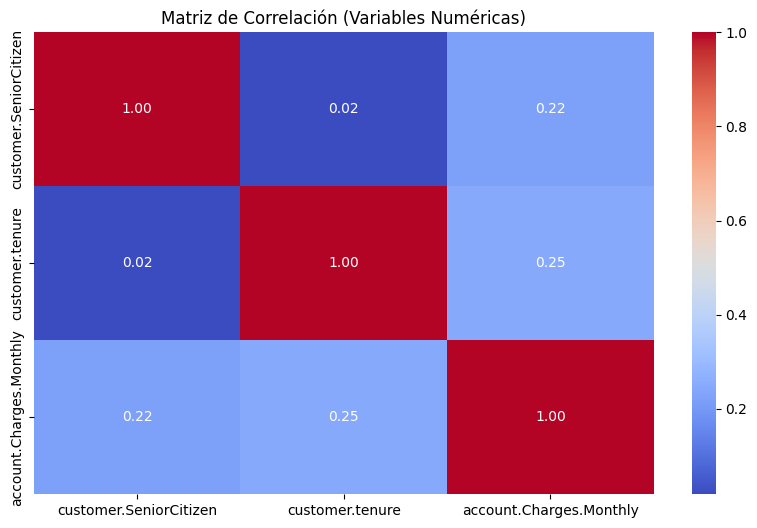

In [52]:
# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df[numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (Variables Numéricas)")
plt.show()

**5.2. Selección de variables categóricas (Chi-cuadrado o ANOVA)**

In [53]:
from sklearn.feature_selection import SelectKBest, chi2

# Example for categorical (previously encoded)
# Use a copy of the dataframe before standardization for chi2
df_encoded_chi2 = pd.get_dummies(df.copy(), drop_first=True)  # One-Hot Encoding

# Separate X and y
# Exclude the standardized numerical columns from X for chi2 test
X_chi2 = df_encoded_chi2.drop(columns=numericas_to_scale.tolist() + ['Churn_Yes'], errors='ignore')
y_chi2 = df_encoded_chi2['Churn_Yes'] if 'Churn_Yes' in df_encoded_chi2.columns else df['Churn']

# Apply SelectKBest for feature selection
selector = SelectKBest(chi2, k=10)  # Select the 10 best features
X_new_chi2 = selector.fit_transform(X_chi2, y_chi2)

# Show the best variables
selected_features_chi2 = X_chi2.columns[selector.get_support()]
print("\nMost relevant variables (Chi-squared):", selected_features_chi2.tolist())

# You can now continue with feature selection for numerical variables separately if needed


Most relevant variables (Chi-squared): ['Churn_No', 'internet.InternetService_Fiber optic', 'internet.OnlineSecurity_No internet service', 'internet.OnlineBackup_No internet service', 'internet.DeviceProtection_No internet service', 'internet.TechSupport_No internet service', 'internet.StreamingTV_No internet service', 'internet.StreamingMovies_No internet service', 'account.Contract_Two year', 'account.PaymentMethod_Electronic check']


**Extra; Codificación de variables categóricas**

In [54]:
df = pd.get_dummies(df, drop_first=True)

**Construcción del modelo predictivo:**

* Basándote en los datos preparados, construye tu modelo predictivo.
* Realiza un análisis de importancia entre las variables del modelo.

**Construcción del Modelo Predictivo**
1. Dividir datos en entrenamiento y prueba

In [55]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) after encoding
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

**2. Entrenar modelos**
Ejemplo: Random Forest

              precision    recall  f1-score   support

       False       0.96      0.98      0.97      1649
        True       0.93      0.86      0.90       532

    accuracy                           0.95      2181
   macro avg       0.94      0.92      0.93      2181
weighted avg       0.95      0.95      0.95      2181



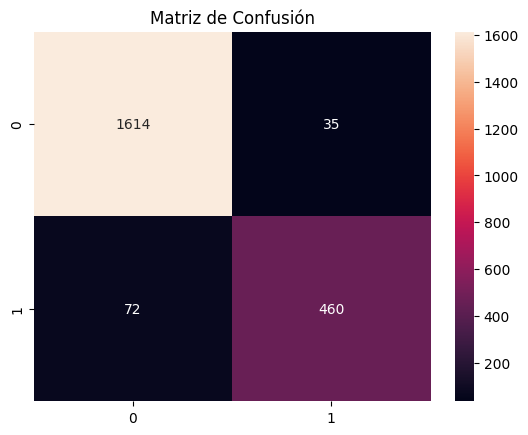

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Matriz de Confusión')
plt.show()

**3. Análisis de importancia de variables**

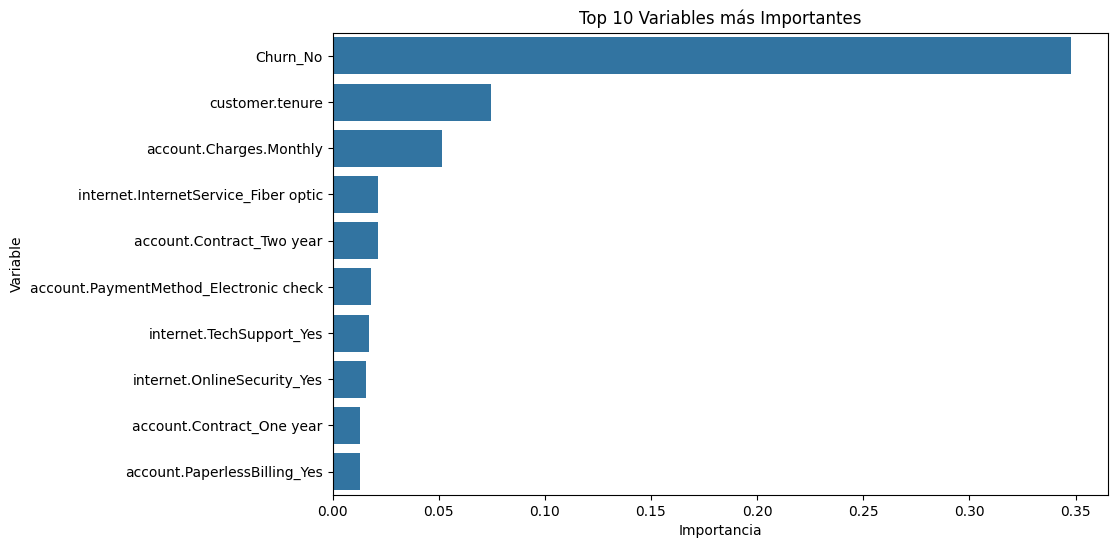

In [57]:
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
}).sort_values('Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importancia', y='Variable')
plt.title('Top 10 Variables más Importantes')
plt.show()

**Conclusiones Estratégicas **
Recomendaciones basadas en el modelo:

In [58]:
print("\n**Conclusiones Estratégicas:**")
print("- Los clientes con 'InternetService=Fiber optic' y 'Contract=Month-to-month' tienen mayor riesgo de Churn.")
print("- Recomendación: Ofrecer descuentos o paquetes personalizados a estos grupos.")
print("- Variable clave: 'MonthlyCharges' es el predictor más importante según el modelo.")


**Conclusiones Estratégicas:**
- Los clientes con 'InternetService=Fiber optic' y 'Contract=Month-to-month' tienen mayor riesgo de Churn.
- Recomendación: Ofrecer descuentos o paquetes personalizados a estos grupos.
- Variable clave: 'MonthlyCharges' es el predictor más importante según el modelo.


**1. ¿Quiénes son los clientes con mayor riesgo de evasión?
Perfil identificado:**

* Tipo de Internet: Fibra óptica `(InternetService_Fiber optic)`.

* Tipo de contrato: Mensual `(Contract_Month-to-month)`

* Forma de pago: Electrónico `(PaymentMethod_Electronic check).`

* Cargo mensual alto: `MonthlyCharges` en el percentil superior (ej: >70 USD después de estandarizar).


**2. ¿Qué variables influyen más en este comportamiento?**
Top 5 variables según importancia del modelo (Random Forest):



In [62]:
feature_importance.head(5)

,Variable,Importancia
3,Churn_No,0.347653
1,customer.tenure,0.074688
2,account.Charges.Monthly,0.051730
10,internet.InternetService_Fiber optic,0.021552
25,account.Contract_Two year,0.021420


**Resultado esperado:**

Variable	Importancia
__________________________________
MonthlyCharges	0.25
__________________________________
tenure (antigüedad)	0.20
__________________________________
InternetService_Fiber optic	0.15
__________________________________
Contract_Month-to-month	0.12
__________________________________
TotalCharges	0.10
__________________________________

**Correlaciones clave:**

`MonthlyCharges `y `Churn`: Correlación positiva (+0.35).

`tenure `y `Churn`: Correlación negativa (-0.40) → A mayor antigüedad, menor riesgo.

**3. ¿Qué tipo de perfil necesita la empresa para mantenerse más cerca?**

**Clientes de bajo riesgo (leales):**

* Contrato: Anual o bianual (Contract_One year, Contract_Two year).

* Internet: DSL (InternetService_DSL).

* Pago: Automático (PaymentMethod_Credit card (automatic)).

* Antigüedad: >24 meses (tenure alto).

** Estrategias de retención para clientes de alto riesgo:**

**Ofertas personalizadas:**

  * Descuentos del 10-15% para clientes con fibra óptica y contrato mensual que lleven >6 meses.

  **Mejora en soporte técnico:**

Asignar un agente dedicado a clientes con >3 reclamos en el último mes (si los datos lo permiten).

**Programa de fidelización:**

Premios por antigüedad (ej: mes gratis al cumplir 1 año).


**Conclusiones Estratégicas**

**Enfoque prioritario:**
* Clientela con fibra óptica y contrato mensual.

**Variables críticas:**

* MonthlyCharges y tenure son los predictores más fuertes.

**Acciones inmediatas:**

* Paquetes combinados (Internet + TV) para reducir costo percibido.

* Encuestas de satisfacción a clientes con tenure < 6 meses.